In [6]:
from os import listdir
from numpy import *
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def kernel(pt,xmat,k):
    m,n=np.shape(xmat)
    wt=np.mat(np.eye(m))
    for j in range(m):
        diff=pt-x[j]
        wt=np.exp(diff*diff.T/-2*k**2)
        
def localWeight(pt,xmat,ymat,k):
    wei=kernel(pt,xmat,k)
    wt=(x.T*(wei*x).I*(x.T*(wei*ymat.T)))
    return wt

def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

data=pd.read_csv('tips.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)

mbill=np.mat(bill)
mtip=np.mat(tip)

m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
x=np.hstack(one.T,mbill.T)
ypred=localWeightRegression(x,mtip,2)
sortInd=x[:,1].argsort(0)
xsort=x[sortInd][:,0]

/var/folders/ns/5fsy_26d2ml4ys0kykxnrl000000gn/T/ipykernel_28405/2023693139.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

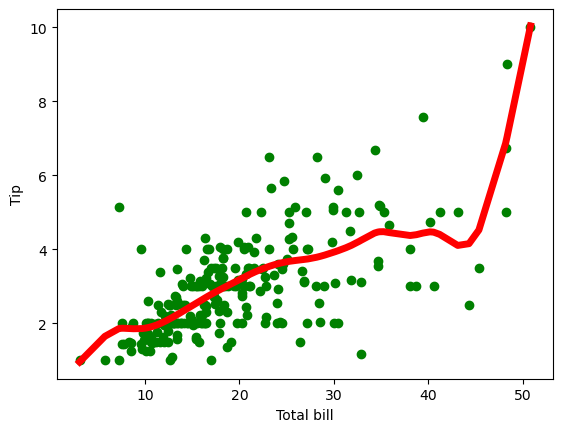

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1

def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
# load data points
data = pd.read_csv('tips1.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip)
m= np1.shape(mbill)[1]
one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T))
#set k here
ypred = localWeightRegression(X,mtip,2)

SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();